# Stokes Sinker

Demonstration example for setting up particle swarms with different material properties. This system consists of a dense, high viscosity sphere falling through a background lower density and viscosity fluid. 

In [1]:
import UWGeodynamics as GEO

In [2]:
u = GEO.UnitRegistry

In [3]:
velocity = 1.0 * u.centimeter / u.hour
model_length = 2. * u.meter
model_height = 1. * u.meter
refViscosity = 1e6 * u.pascal * u.second
bodyforce = 200 * u.kilogram / u.metre**3 * 9.81 * u.meter / u.second**2

KL = model_height
Kt = KL / velocity
KM = bodyforce * KL**2 * Kt**2

GEO.scaling.scaling["[length]"] = KL
GEO.scaling.scaling["[time]"] = Kt
GEO.scaling.scaling["[mass]"]= KM

In [4]:
Model = GEO.Model(elementRes=(64, 64), 
                  minCoord=(-1. * u.meter, -50. * u.centimeter), 
                  maxCoord=(1. * u.meter, 50. * u.centimeter))

In [5]:
lightMaterial = Model.add_material(name="Light", shape=GEO.shapes.Layer(top=Model.top, bottom=Model.bottom))
heavyMaterial = Model.add_material(name="Heavy", shape=GEO.shapes.Disk(center=(0.,30.*u.centimetre), radius=10. * u.centimetre))


In [6]:
lightMaterial.density = 10 * u.kilogram / u.metre**3
heavyMaterial.density = 500 * u.kilogram / u.metre**3

lightMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)
heavyMaterial.viscosity = GEO.ConstantViscosity(1e6 * u.pascal * u.second)

In [7]:
Model.set_velocityBCs(left=[0, None], right=[0,None], top=[None, 0.], bottom=[None, 0])


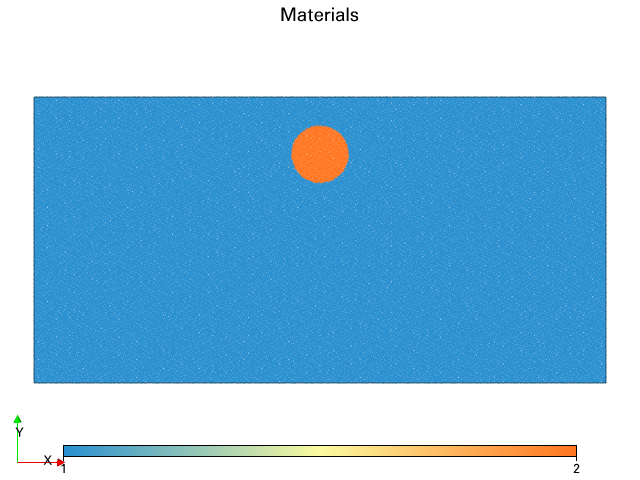

In [8]:
Fig = Model.plot.material(projected=False, fn_size=2.0)

In [9]:
Model.init_model()

In [10]:
Model.run_for(1.0 * u.hours)

Time:  0.131697937591 hour dt: 0.131697937591 hour
Time:  0.260755923734 hour dt: 0.129057986143 hour
Time:  0.387766649654 hour dt: 0.127010725919 hour
Time:  0.512780321068 hour dt: 0.125013671415 hour
Time:  0.636445697741 hour dt: 0.123665376672 hour
Time:  0.758512168505 hour dt: 0.122066470764 hour
Time:  0.878068626809 hour dt: 0.119556458304 hour
Time:  0.996022463343 hour dt: 0.117953836534 hour
Time:  1.0 hour dt: 0.00397753665681 hour



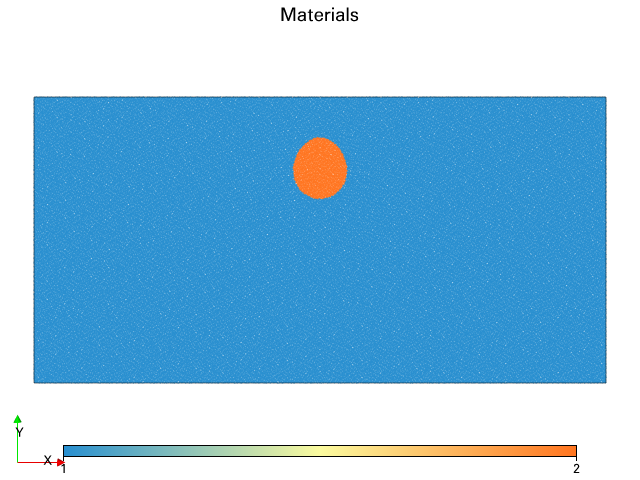

In [13]:
Fig = Model.plot.material(projected=False, fn_size=2.0)


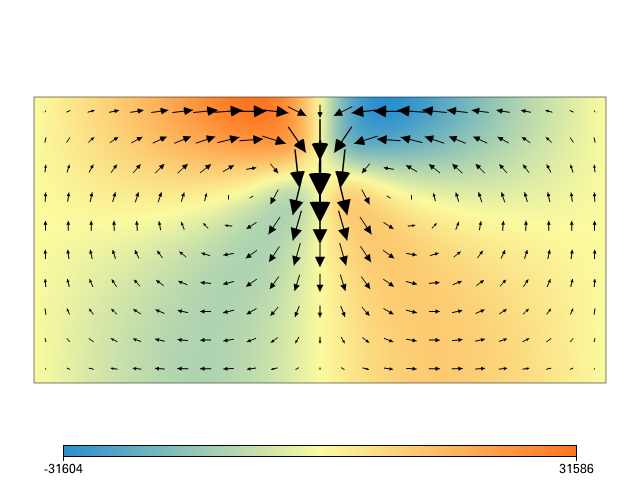

In [12]:
Fig = Model.plot.velocityField()